In [1]:
import os
import pathlib
import sys

default_dir_path = str(pathlib.Path(os.getcwd()).parent.absolute())

sys.path.append(default_dir_path)

from properties import ApplicationProperties

[2020-12-18 15:54:48,848][INFO][properties.py:22] Complete to apply the random seed, RANDOM_SEED : 777


In [11]:
import os
import pickle

import pandas as pd

In [16]:
auc_file_name_list = ["ae_ocsvm.pkl", "sae_ocsvm.pkl", "oesae_ocsvm_margin001.pkl", "oesae_ocsvm_margin01.pkl", "oesae_ocsvm_margin05.pkl", "oesae_ocsvm_margin1.pkl", "oesae_ocsvm_margin10.pkl"]
home_dir_file_path = "./result_data/"
font_size=15

In [17]:
auc_list_dict = dict()

for auc_file_name in auc_file_name_list:
    pkl_file_path = home_dir_file_path + auc_file_name
    
    with open(pkl_file_path, "rb") as f:
        auc_list_dict[os.path.splitext(auc_file_name)[0]] = pickle.load(f)

In [18]:
auc_ma_list_dict = dict()

for key, auc_list in auc_list_dict.items():
    auc_ma_list_dict[key] = pd.Series(auc_list).rolling(50).mean()

In [24]:
import matplotlib.pyplot as plt

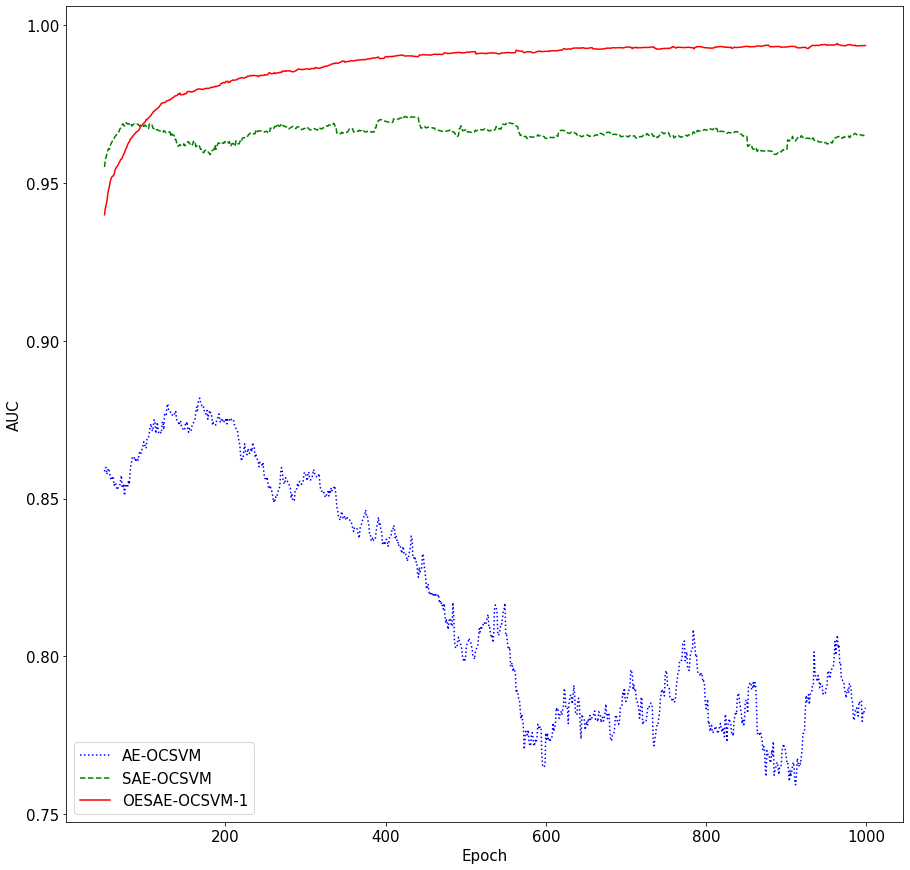

In [26]:
fig = plt.figure(figsize=(15, 15))

plt.plot(
    range(len(auc_ma_list_dict["ae_ocsvm"])),
    auc_ma_list_dict["ae_ocsvm"],
    label="AE-OCSVM",
    linestyle="dotted",
    color="blue"
)
plt.plot(
    range(len(auc_ma_list_dict["ae_ocsvm"])),
    auc_ma_list_dict["sae_ocsvm"],
    label="SAE-OCSVM",
    linestyle="dashed",
    color="green"
)
plt.plot(
    range(len(auc_ma_list_dict["ae_ocsvm"])),
    auc_ma_list_dict["oesae_ocsvm_margin1"],
    label="OESAE-OCSVM-1",
    linestyle="solid",
    color="red"
)
    
plt.xlabel("Epoch", fontsize=font_size)
plt.ylabel("AUC", fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=font_size)

plt.legend(fontsize=font_size)
plt.savefig("./plot/auc_result.png")

plt.show();